In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
%matplotlib inline

In [2]:
raw_df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
raw_df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
raw_df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
raw_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
print(raw_df_train.HomePlanet.unique())
print(raw_df_train.CryoSleep.unique())
print(raw_df_train.Destination.unique())

['Europa' 'Earth' 'Mars' nan]
[False True nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


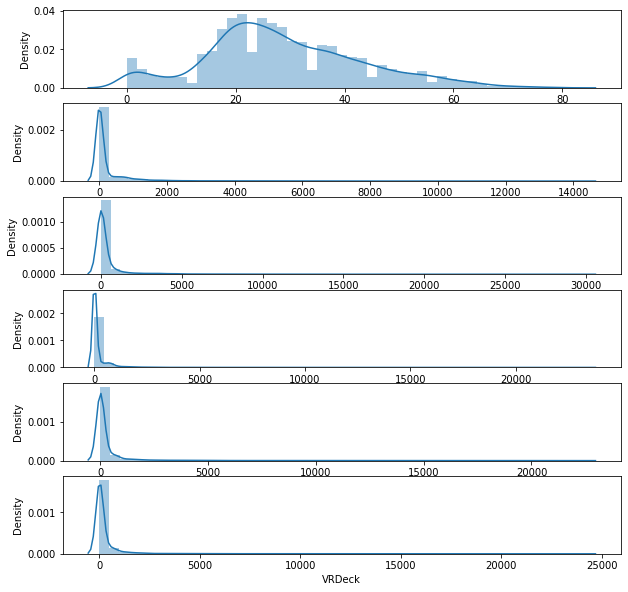

In [6]:
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(6,figsize = (10,10))
sns.distplot(raw_df_train["Age"],ax = axs[0])
sns.distplot(raw_df_train["RoomService"],ax = axs[1])
sns.distplot(raw_df_train["FoodCourt"], ax = axs[2])
sns.distplot(raw_df_train["ShoppingMall"], ax = axs[3])
sns.distplot(raw_df_train["Spa"],ax = axs[4])
sns.distplot(raw_df_train["VRDeck"], ax = axs[5])
plt.show()

In [7]:
le = preprocessing.LabelEncoder()

def clean(data):
    
    data[["Deck", "Num", "Side"]] = data["Cabin"].str.split("/", expand = True)
    data = data.drop(["Name", "PassengerId"], axis = 1)
    
    data["HomePlanet"] = data["HomePlanet"].map({"Europa" : 0, "Earth" : 1, "Mars" : 2})
    data["HomePlanet"].fillna(data["HomePlanet"].mode()[0], inplace = True)
    
    data["CryoSleep"] = data["CryoSleep"].map({False : 0, True : 1})
    data["CryoSleep"].fillna(data["CryoSleep"].mode()[0], inplace = True)
    
    data["Destination"] = data["Destination"].map({"TRAPPIST-1e" : 0, "PSO J318.5-22" : 1, "55 Cancri e" : 2})
    data["Destination"].fillna(data["Destination"].mode()[0], inplace = True)
    
    data["Age"].fillna(data["Age"].median(), inplace = True)
    
    data["VIP"] = data["VIP"].map({False : 0, True : 1})
    data["VIP"].fillna(data["VIP"].mode()[0], inplace = True)
    
    data["RoomService"].fillna(data["RoomService"].median(), inplace = True)
    data["FoodCourt"].fillna(data["FoodCourt"].median(), inplace = True)
    data["ShoppingMall"].fillna(data["ShoppingMall"].median(), inplace = True)
    data["Spa"].fillna(data["Spa"].median(), inplace = True)
    data["VRDeck"].fillna(data["VRDeck"].median(), inplace = True)
    
    data["Deck"] = data["Deck"].map({"A" : 0, "B" : 1, "C" : 2, "D" : 3, "E" : 4, "F" : 5, "G" : 6, "T" : 7})
    data["Deck"].fillna(data["Deck"].mode()[0], inplace = True)
    
    data["Num"].fillna(data["Num"].median(), inplace = True)
    data["Num"] = data["Num"].astype(np.uint8)
    
    data["Side"] = data["Side"].map({"P" : 0, "S" : 1})
    data["Side"].fillna(data["Side"].mode()[0], inplace = True)
    
    
    return data

In [8]:
df_train = clean(raw_df_train)
df_test = clean(raw_df_test)

In [9]:
df_train.sample(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
7869,0.0,0.0,D/260/P,0.0,32.0,0.0,0.0,13.0,0.0,2148.0,319.0,False,3.0,4,0.0
6344,1.0,1.0,G/1092/S,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,True,6.0,68,1.0
7541,2.0,1.0,F/1541/S,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,True,5.0,5,1.0
7500,0.0,1.0,D/249/P,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,True,3.0,249,0.0
6373,1.0,0.0,F/1286/S,1.0,18.0,0.0,103.0,0.0,181.0,1611.0,22.0,False,5.0,6,1.0
4123,2.0,1.0,F/830/S,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,True,5.0,62,1.0
8272,1.0,1.0,G/1424/S,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,True,6.0,144,1.0
8478,1.0,0.0,F/1853/P,0.0,28.0,0.0,0.0,8.0,338.0,135.0,390.0,False,5.0,61,0.0
7332,1.0,0.0,G/1261/P,0.0,34.0,0.0,0.0,9.0,617.0,0.0,281.0,False,6.0,237,0.0
543,0.0,1.0,C/21/P,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2.0,21,0.0


In [10]:
Y = df_train["Transported"].map({False : 0, True : 1})
X = df_train.drop(["Transported", "Cabin"], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state = 42, test_size = 0.1)

## Decision Tree Classifier

In [11]:
df_test = df_test.drop(["Cabin"], axis = 1)

In [12]:
model_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)
preds_tree = model_tree.predict(X_val)
acc = accuracy_score(y_val, preds_tree)
sub_tree = model_tree.predict(df_test)
print(f"Accuracy Score is {acc*100}%")

Accuracy Score is 73.5632183908046%


## Random Forest Classifier

In [13]:
model_rf = RandomForestClassifier(n_estimators=500, random_state=42).fit(X_train, y_train)
preds_rf = model_rf.predict(X_val)
acc_rf = accuracy_score(y_val, preds_rf)
sub_rf = model_rf.predict(df_test)
print(f"Accuracy Score is {acc_rf*100}%")

Accuracy Score is 78.73563218390804%


## Neural Network

In [14]:
x_train = X_train/X_train.max()
x_val = X_val/X_val.max()

train_x = []
train_y = []

val_x = []
val_y = []

for i in range(len(x_train)):
    temp = x_train.iloc[i]
    train_x.append(temp)
    
for i in range(len(x_val)):
    temp = x_val.iloc[i]
    val_x.append(temp)
    
train_x = np.array(train_x)
train_y = np.array(y_train)
val_x = np.array(val_x)
val_y = np.array(y_val)

In [15]:
INPUT_SHAPE = train_x[0].shape
model = Sequential()

model.add(Dense(units = 128, activation="relu", input_shape = INPUT_SHAPE))
model.add(Dense(units = 256, activation="relu"))
model.add(Dense(units = 512, activation="relu"))
model.add(Dense(units = 256, activation="relu"))
model.add(Dense(units = 128, activation="relu"))

model.add(Dense(units = 1, activation="sigmoid"))

2022-12-23 18:18:39.834655: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 330,753
Trainable params: 330,753
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [18]:
# h = model.fit(train_x, train_y, 
#               epochs = 100,
#               validation_data=(val_x, val_y))

In [19]:
# x_test = df_test/df_test.max()
# x_test = x_test.drop(["Cabin"], axis = 1)
# x_test = x_test.iloc[:,[5, 1, 3, 0, 11, 7, 4, 8, 10, 12, 2, 6, 9]]
# test_x = []

# for i in range(len(x_test)):
#     temp = x_test.iloc[i]
#     test_x.append(temp)

# test_x = np.asarray(test_x).astype(np.float32)

# pred_nn = model.predict(test_x)
# pred_nn = pred_nn.flatten()
# submit = pd.DataFrame({
#     "PassengerId" : raw_df_test["PassengerId"],
#     "Transported" : pred_nn
# })

# submit["Transported"] = submit["Transported"].apply(lambda x: 1 if x>0.5 else 0)
# submit.to_csv("submission.csv", index = False)

In [20]:
submit = pd.DataFrame({
    "PassengerId" : raw_df_test["PassengerId"],
    "Transported" : sub_rf
})

submit["Transported"] = submit["Transported"].apply(lambda x: True if x==1 else False)

In [21]:
submit

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [22]:
submit.to_csv("submission.csv", index = False)